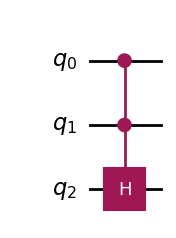

In [4]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit.circuit.library import UnitaryGate
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt


qc = QuantumCircuit(3)
H = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])
H_gate = UnitaryGate(H,label="H")
cH = H_gate.control(2,label="")
qc.append(cH,[0,1,2])
qc.draw("mpl")

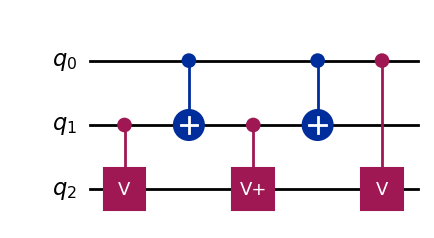

In [5]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit.circuit.library import UnitaryGate
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt

from qiskit.circuit.library import HGate
import cmath

H = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])

# Gets eigenvalues/vectors of H.
e_val,e_vec = np.linalg.eig(H)

# Constructs D and D^{1.2}
D = np.array([[e_val[0],0],[0,e_val[1]]])
Dhalf = np.array([[cmath.sqrt(e_val[0]),0],[0,cmath.sqrt(e_val[1])]])

# Construct K and K^-1
K = e_vec
Kinv = np.linalg.inv(K)

# Now we make V and Vdag, using K * Dhalf * Kinv.

V = K@Dhalf@Kinv
Vdag = V.T.conj()

# And now we construct the circuit.

qc = QuantumCircuit(3)

# construct unique cV and cVdag gates
V_gate = UnitaryGate(V,label="V")
Vdag_gate = UnitaryGate(Vdag,label="V+")
cV = V_gate.control(1,label="")
cVdag = Vdag_gate.control(1,label="")

X = np.array([[0,1],[1,0]])

# Controlled V on bits [1,2]

qc.append(cV,[1,2])

# CNOT on [0,1]
qc.cx(0,1)


# Controlled Vdagger on bits [1,2] 

qc.append(cVdag,[1,2])


# CNOT on [0,1]
qc.cx(0,1)


# Controlled V on bits [0,2]
qc.append(cV,[0,2])

qc.draw("mpl")

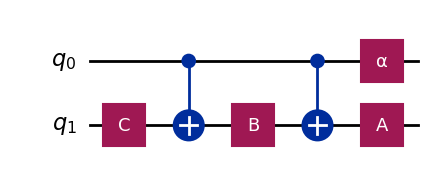

In [5]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit.circuit.library import UnitaryGate
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt

from qiskit.circuit.library import HGate
import cmath

A = np.array([[1,0],[0,1]])
B = np.array([[1,0],[0,1]])
C = np.array([[1,0],[0,1]])
P = np.array([[1,0],[0,1]])

A_gate = UnitaryGate(A,label="A")
B_gate = UnitaryGate(B,label="B")
C_gate = UnitaryGate(C,label="C")
P_gate = UnitaryGate(P,label="α")

qc = QuantumCircuit(2)

qc.append(C_gate,[1])
qc.cx(0,1)
qc.append(B_gate,[1])
qc.cx(0,1)
qc.append(A_gate,[1])
qc.append(P_gate,[0])

qc.draw('mpl')



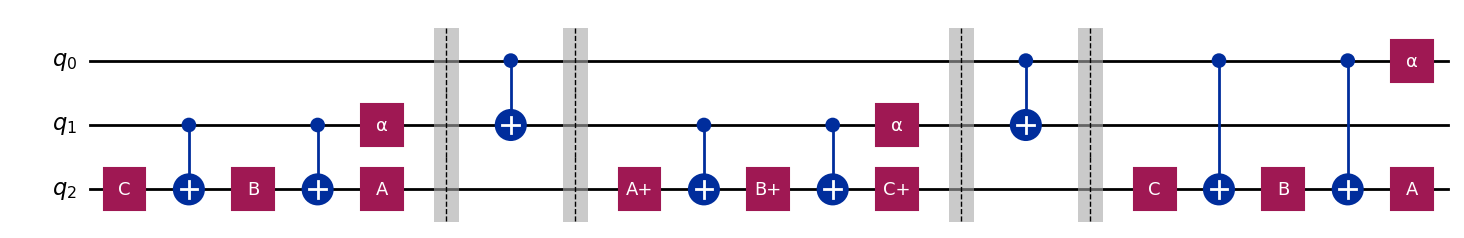

In [10]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit.circuit.library import UnitaryGate
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt

from qiskit.circuit.library import HGate
import cmath

A = np.array([[1,0],[0,1]])
B = np.array([[1,0],[0,1]])
C = np.array([[1,0],[0,1]])
P = np.array([[1,0],[0,1]])

A_gate = UnitaryGate(A,label="A")
B_gate = UnitaryGate(B,label="B")
C_gate = UnitaryGate(C,label="C")
P_gate = UnitaryGate(P,label="α")
Adag_gate = UnitaryGate(A,label="A+")
Bdag_gate = UnitaryGate(B,label="B+")
Cdag_gate = UnitaryGate(C,label="C+")

qc = QuantumCircuit(3)

qc.append(C_gate,[2])
qc.cx(1,2)
qc.append(B_gate,[2])
qc.cx(1,2)
qc.append(A_gate,[2])
qc.append(P_gate,[1])


qc.barrier()
qc.cx(0,1)
qc.barrier()

qc.append(Adag_gate,[2])
qc.cx(1,2)
qc.append(Bdag_gate,[2])
qc.cx(1,2)
qc.append(Cdag_gate,[2])
qc.append(P_gate,[1])

qc.barrier()
qc.cx(0,1)
qc.barrier()

qc.append(C_gate,[2])
qc.cx(0,2)
qc.append(B_gate,[2])
qc.cx(0,2)
qc.append(A_gate,[2])
qc.append(P_gate,[0])




qc.draw('mpl')

|00>: (0.4999999999999999+0j)
|01>: (-0.4999999999999999+0j)
|10>: (-3.0616169978683824e-17-0.4999999999999999j)
|11>: (3.0616169978683824e-17+0.4999999999999999j)
------


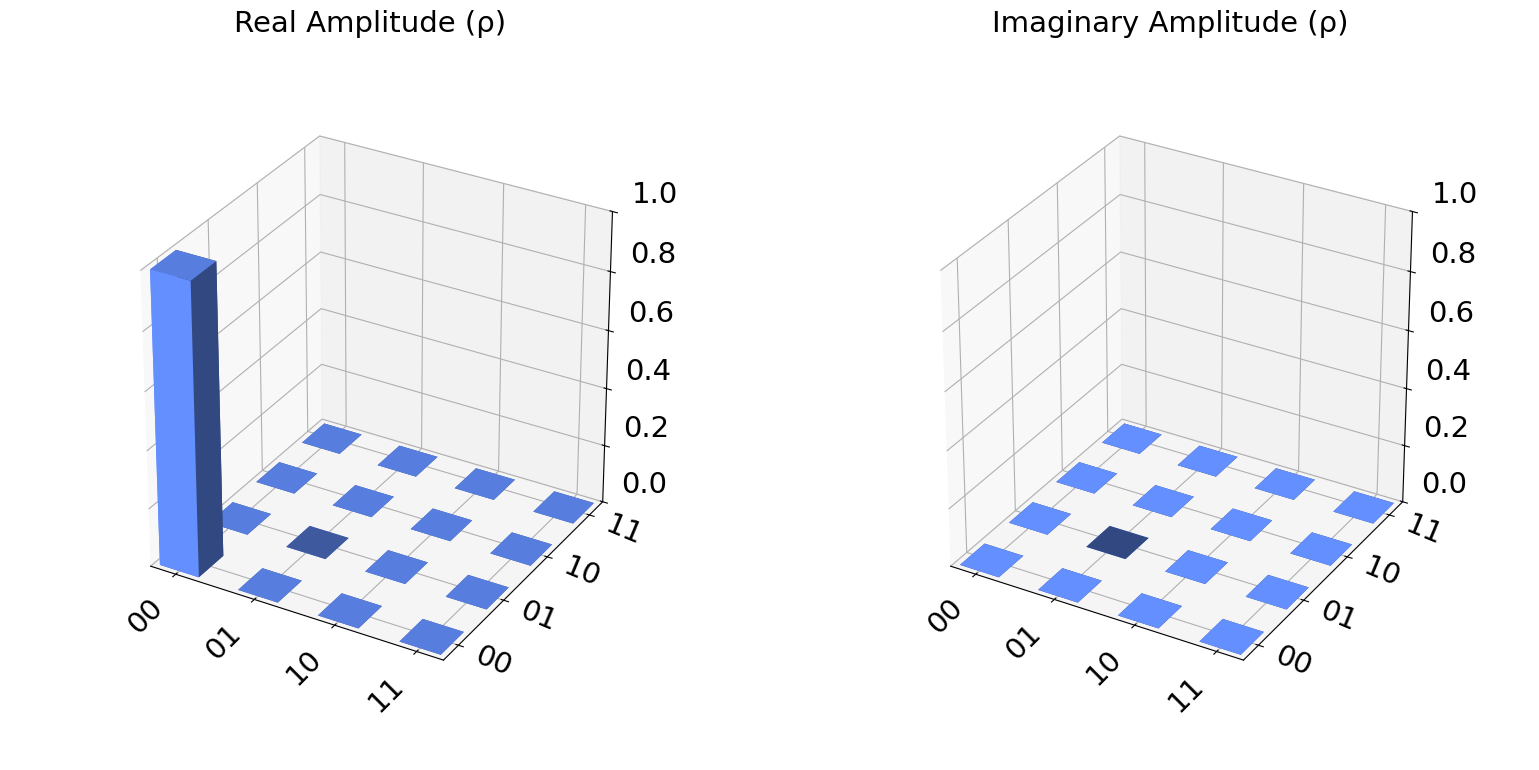

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram


# This defines a function to perform the Quantum Fourier Transform 
# on the first n qubits of a circuit.
def qft(circuit, n):
    # Loops over each qubit j (from 0 to n-1)
    for j in range(n):
        # Applies a Hadamard gate to qubit j.
        # This creates a superposition, which is the first step of the QFT.
        circuit.h(j)
        # Loops over the qubits after j to apply controlled phase rotations, 
        # which encode the relative phases in the Fourier basis.
        for k in range(j+1, n):
            # Computes the rotation angle for the controlled phase
            angle = np.pi / 2**(k-j)
            # Applies a controlled-phase gate:
            # qubit k is the control, qubit j is the target, 
            # and the target’s phase is rotated by angle if the control is |1>.
            circuit.cp(angle, k, j)
    for i in range(n//2):
        # After the rotations, QFT reverses the order of qubits.
        # This loop swaps qubits from start to end to correct the order.
        circuit.swap(i, n-i-1)
    return circuit

# Circuit
n = 2
qc = QuantumCircuit(n)
qc.x(0)
qc.x(n-1)
qft(qc, n)

# Get statevector without Aer
state = Statevector.from_instruction(qc)
state_dict = state.to_dict()
for basis, amplitude in state_dict.items():
            print(f"|{basis}>: {amplitude}")
print("------")
qc.draw('mpl')

plot_state_city(Statevector.from_label('00'))
#plot_state_city(state,alpha=0.6)            # 3D bars showing real/imag parts

